In [1]:
import os
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def transform_ts(x, maxTT):

    minx = min(x)  
    x    = [xx - minx for xx in x] 
    maxx = max(x)
    x    = [xx * maxTT / maxx for xx in x]
    
    return x


def getBinnedDistribution(x, y, nbins):

    n, bins = np.histogram(x, bins=nbins)
    sy, _   = np.histogram(x, bins=nbins, weights=y)
    mean    = sy/n

    return _, mean

In [23]:
venuefile  = outfolder + '/clusters_venues/6'
venue_dict = {}


for fn in [fff for fff in os.listdir(venuefile) if '484' in fff]:
    ccc = fn.split('_')[2]
    venue_dict[ccc] = [line.strip() for line in open(venuefile + '/' + fn)]

In [14]:
city       = 'london'
infile     = '../ProcessedData/' + city + '/timeseries/senior_timeseries_8_12.dat'
venues_ts  = {}

for ind, line in enumerate(open(infile)):
    fields = line.strip().split('\t')
    venue  = fields[0]
    ts     = fields[1:]
    venues_ts[venue] = savgol_filter(np.asarray([float(fff) for fff in ts  ] ), 7, 3) 

len(venues_ts)

4461

In [24]:
len(venue_dict)

6

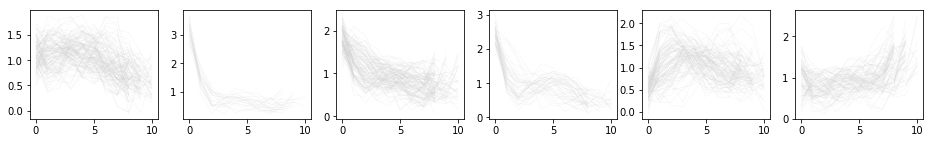

In [27]:
f, ax = plt.subplots(1, 6, figsize=(16, 2)) 

for ind, (c, vens) in enumerate(venue_dict.items()):
    for v in vens:
        ax[ind].plot(venues_ts[v], linewidth = 0.4, color = 'lightgrey', alpha= 0.3)

In [40]:
maturity   = 'senior_8_12'
method     = 'complete'
city       = 'london'
outfolder  = '../ProcessedData/' + city + '/timeseries/' + maturity  
fclusters  = [outfolder + '/avg_curves_clusters' + '/' + f for f in os.listdir(outfolder + '/avg_curves_clusters') if '.' not in f]

fclusters

OSError: [Errno 2] No such file or directory: '../ProcessedData/london/timeseries/senior_8_12/avg_curves_clusters'

In [50]:
print venues_ts['4c092869bbc676b0aeab47d5']

[1.65187926 1.17700902 1.01559085 1.01257429 0.80107898 0.79849239
 0.46007972 0.51140614 1.3395489 ]


208


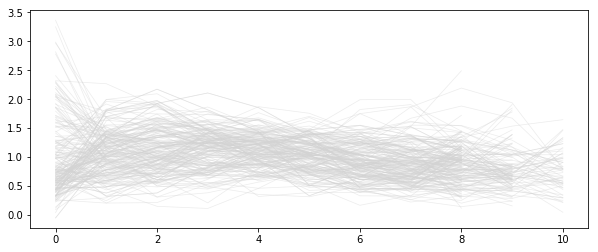

In [49]:
venues = [line.strip() for line in open(outfolder + '/clusters_venues/6/venues_in_493_4.dat')]
print len(venues)
f, ax = plt.subplots(1, 1, figsize=(10, 4)) 
for v in venues:
    ax.plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)

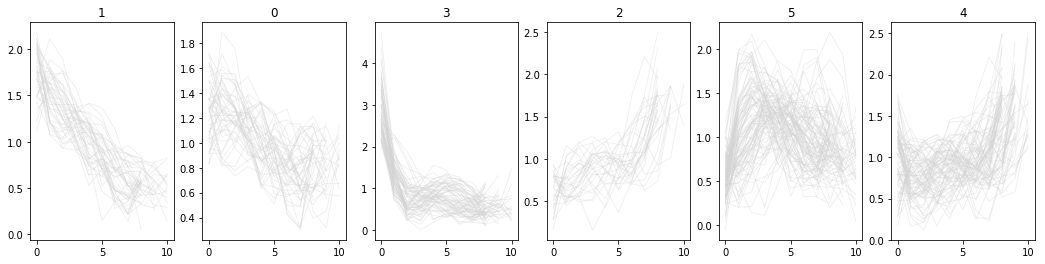

In [14]:
f, ax = plt.subplots(1, 6, figsize=(18, 4)) 

for ind, (c, vs) in enumerate(venue_dict.items()):
    
    if int(c) < 100:
        for v in vs:
            ax[ind].set_title(c)
            if v in venues_ts:
                ax[ind].plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)
    

'r_8_12/avg_curves/5/avg_curve_0_283.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_3_309.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_272.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_278.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_341.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_4_316.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_4_309.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/3/avg_curve_1_283.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_255.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_0_468.dat\n../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_449.da    \n'

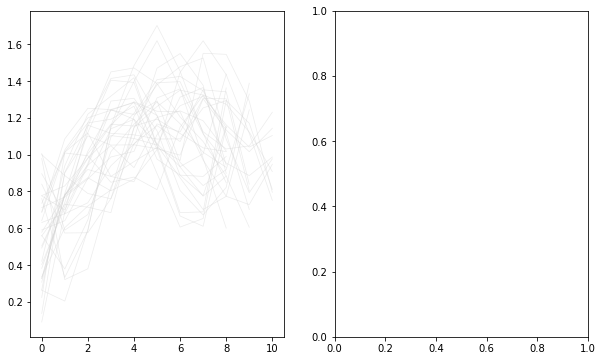

In [26]:
venues = venues_in_493_2.dat   
    
f, ax = plt.subplots(1, 2, figsize=(10, 6)) 
for v in venues:
    ax[0].plot(venues_ts[v], color = 'lightgrey', alpha = 0.43, linewidth = 0.7)
    
    
    
'''r_8_12/avg_curves/5/avg_curve_0_283.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_3_309.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_272.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_278.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_1_341.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_4_316.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/5/avg_curve_4_309.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/3/avg_curve_1_283.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/10/avg_curve_7_255.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_0_468.dat
../ProcessedData/london/timeseries/senior_8_12/avg_curves/6/avg_curve_3_449.da    
'''

In [ ]:
for folder in fclusters:
    
    if '6_48' in folder:
    
        files = [folder +'/' + fff for fff in os.listdir(folder)]

        cluster_venues = {}
        
        for fn in files:
        
            print fn
            
            cluster = fn.replace('.dat','').split('_')[-1]

            for line in open(fn):
                NNN = line.strip().split('/')[6]
              #  print NNN
                #if '5' == NNN:
                if 2 == 2:
                    n_c = line.strip().split('_')[5]
                    n_n = line.strip().split('_')[6].replace('.dat', '')

                    venuefile = outfolder + '/clusters_venues/' + NNN + '/' + 'venues_in_' + n_n + '_' + n_c + '.dat'  
                    venues    = [line.strip() for line in open(venuefile)] 

                    if cluster not in cluster_venues:
                        cluster_venues[cluster] = set(venues)
                    else:
                        cluster_venues[cluster].union(set(venues))

for s, v in cluster_venues.items():
    print s, len(v)

4461

In [ ]:
for ind, (cluster, venues) in enumerate(cluster_venues.items()):

    print cluster, len(venues)

In [ ]:
f, ax = plt.subplots(6, 1, figsize=(6, 15)) 

for cluster, venues in cluster_venues.items():
    
    cluster  = int(cluster)
    print cluster, len(venues)
 
    ttt = []
    sss = []
    
    for v in venues:
        y = venues_ts[v]
        x = transform_ts(range(len(y)), 11)   
     
        ttt += list(x)
        sss += list(y)
    
        ax[cluster].plot(x, y, linewidth = 0.2, color = 'lightgrey', alpha = 0.75)
        
        
    bx, by = getBinnedDistribution(ttt, sss, 8  )
    bx     = (bx[1:] + bx[:-1])/2
    ax[cluster].set_title('Number of venues = ' + str(len(venues)), fontsize = 14)
    ax[cluster].plot(bx, by, linewidth = 3, color = 'steelblue')
    
    ax[cluster].spines['bottom'].set_color('lightgrey')
    ax[cluster].spines['top'].set_color('lightgrey')
    ax[cluster].spines['left'].set_color('lightgrey')
    ax[cluster].spines['right'].set_color('lightgrey')
    ax[cluster].get_xaxis().set_visible(False)
    ax[cluster].get_yaxis().set_visible(False)
    ax[cluster].set_ylim([0.5, 1.6])
    
#plt.savefig('../ProcessedData/' + city + '/timeseries/' + maturity + '/avg_curves_clusters/averaging_venues_6_52')
    